In [ ]:
# C:\Users\delfi\Desktop\MMI\DI725\assignment_2

In [2]:
import zipfile
import os
import json

In [21]:
with open('auair2019/annotations.json') as f:
    data = json.load(f)

print(f"Number of annotations: {len(data['annotations'])}")
print(f"Number of categories: {len(data['categories'])}")
print(data.keys())

print(data['categories'])
print(type(data['categories']))
for cat in data['categories']:
    print(cat, type(cat))  # Print each element and its type

Number of annotations: 32823
Number of categories: 8
dict_keys(['info', 'licenses', 'categories', 'annotations'])
['Human', 'Car', 'Truck', 'Van', 'Motorbike', 'Bicycle', 'Bus', 'Trailer']
<class 'list'>
Human <class 'str'>
Car <class 'str'>
Truck <class 'str'>
Van <class 'str'>
Motorbike <class 'str'>
Bicycle <class 'str'>
Bus <class 'str'>
Trailer <class 'str'>


In [29]:
print(data['annotations'][:5]) 

[{'image_name': 'frame_20190829091111_x_0001973.jpg', 'image_width:': 1920.0, 'image_height': 1080.0, 'platform': 'Parrot Bebop 2', 'time': {'year': 2019, 'month': 8, 'day': 29, 'hour': 9, 'min': 11, 'sec': 11, 'ms': 394400.0}, 'longtitude': 10.18798203255313, 'latitude': 56.20630134795274, 'altitude': 19921.6, 'linear_x': 0.03130074199289083, 'linear_y': 0.028357808757573367, 'linear_z': 0.0744575835764408, 'angle_phi': -0.06713105738162994, 'angle_theta': 0.06894744634628296, 'angle_psi': 1.1161083340644837, 'bbox': [{'top': 163, 'left': 1098, 'height': 185, 'width': 420, 'class': 1}, {'top': 421, 'left': 1128, 'height': 176, 'width': 393, 'class': 1}, {'top': 927, 'left': 1703, 'height': 153, 'width': 183, 'class': 0}]}, {'image_name': 'frame_20190829091111_x_0000334.jpg', 'image_width:': 1920.0, 'image_height': 1080.0, 'platform': 'Parrot Bebop 2', 'time': {'year': 2019, 'month': 8, 'day': 29, 'hour': 9, 'min': 11, 'sec': 11, 'ms': 66600.0}, 'longtitude': 10.187932821361423, 'latit

In [ ]:
category_id_to_name = {i: cat for i, cat in enumerate(data['categories'])}
# Build mapping from ID to name
print("Category ID to Name Mapping:", category_id_to_name)

Category ID to Name Mapping: {0: 'Human', 1: 'Car', 2: 'Truck', 3: 'Van', 4: 'Motorbike', 5: 'Bicycle', 6: 'Bus', 7: 'Trailer'}


### Class distribution

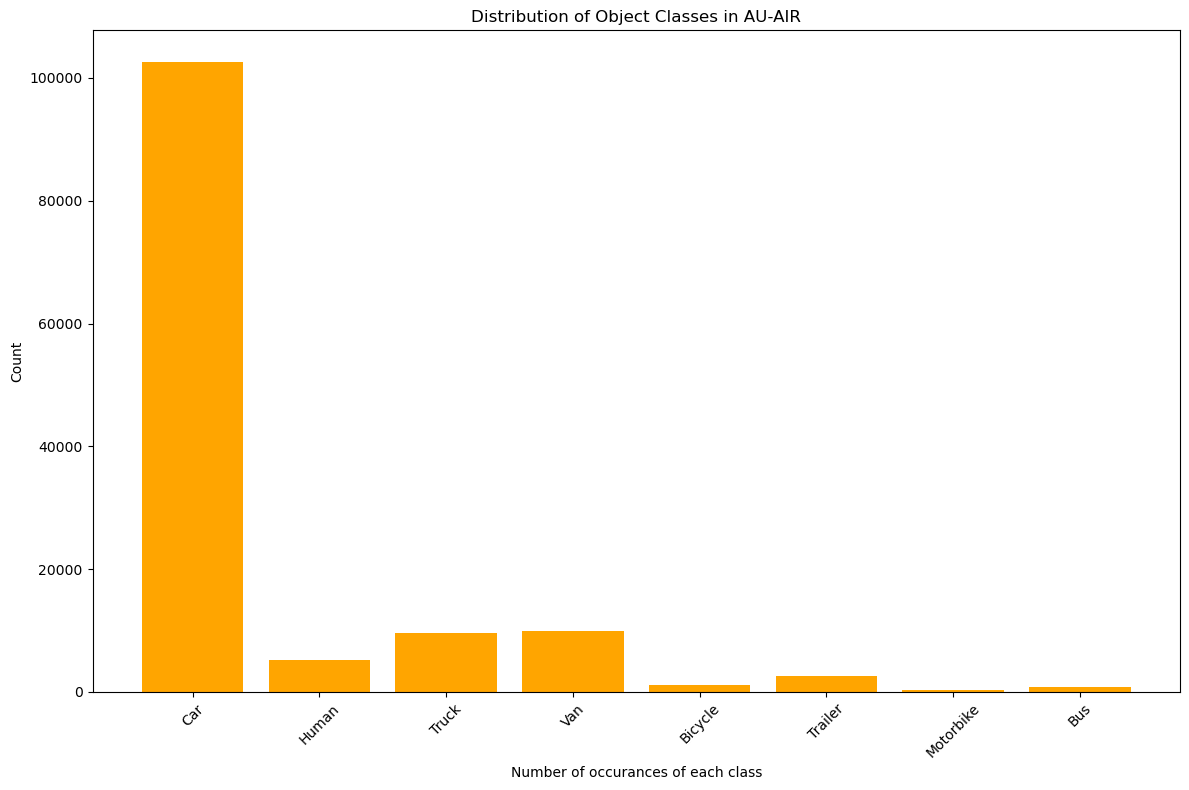

In [36]:
from collections import Counter
import matplotlib.pyplot as plt

class_ids = []
for item in data['annotations']:
    for bbox in item['bbox']:
        class_ids.append(bbox['class'])

category_counts = Counter(class_ids)
labels = [category_id_to_name[k] for k in category_counts.keys()]
counts = list(category_counts.values())

plt.figure(figsize=(12, 8))
plt.bar(labels, counts, color='orange')
plt.title("Distribution of Object Classes in AU-AIR")
plt.xlabel("Number of occurances of each class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Bounding box size distribution

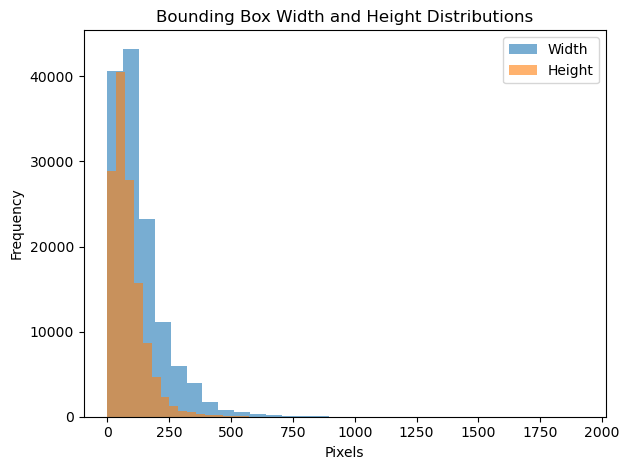

In [37]:
widths = []
heights = []

for item in data['annotations']:
    for bbox in item['bbox']:
        widths.append(bbox['width'])
        heights.append(bbox['height'])

plt.hist(widths, bins=30, alpha=0.6, label='Width')
plt.hist(heights, bins=30, alpha=0.6, label='Height')
plt.legend()
plt.title("Bounding Box Width and Height Distributions")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### peeking one random sample image with bboxes

In [40]:
import os
from PIL import Image, ImageDraw
import random

image_dir = 'auair2019/images'
image_info = random.choice(data['annotations'])

img_path = os.path.join(image_dir, image_info['image_name'])

if os.path.exists(img_path):
    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)

    for bbox in image_info['bbox']:
        left = bbox['left']
        top = bbox['top']
        width = bbox['width']
        height = bbox['height']
        cls = bbox['class']
        label = category_id_to_name[cls]

        draw.rectangle([left, top, left + width, top + height], outline="red", width=2)
        draw.text((left, top), label, fill="yellow")

    img.show()
else:
    print(f"Image {img_path} not found!")
